# Quick MEPS Analysis to select frequent drugs


### Data Description


Data from the [MEPS-HC can be accessed here](https://datatools.ahrq.gov/meps-hc/?tab=prescribed-drugs&dash=18)

About the MEPS-HC
: The MEPS Household Component collects data on all members of sample households from selected communities across the United States. These data can be used to produce nationally representative estimates of medical conditions, health status, use of medical care services, charges and payments, access to care, experience with care, health insurance coverage, income, and employment.

The summary tables provide frequently used summary estimates for the U.S. civilian non-institutionalized population.

This tool is provided as a convenience. It is the responsibility of the user to review the results for statistical significance and overall reasonableness.

MEPTS HC DATA DESCRIPTION
: MEPS-HC survey participants are asked about their prescription drugs and then are asked for permission to collect more detailed information from their pharmacies. At the pharmacies, data are collected on the type, dosage, and payment for each filled prescription. No information is collected for over-the-counter medications. No information is collected for prescription drugs obtained during hospital visits.

`Measure Values` are Number of People with pruchase (in thousands)

**Suggested Citation**

Agency for Healthcare Research and Quality. Number of people with purchase in thousands by therapeutic class, United States, 1996 to 2020. Medical Expenditure Panel Survey.

check drugs to chose from [Mayo Clinic here](https://www.mayoclinic.org/diseases-conditions/depression/in-depth/antidepressants/art-20046273)


# import packages and load data


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tabulate

%cd '/Users/jlq293/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofCopenhagen/UCPH_CORS - Documents/Research [PhD projects, MSc projects etc.]/PhD project - Lukas - Efficacy-effectiveness gab/02 Project/Study 1/Study1-Div/DrugSelection'

/Users/jlq293/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofCopenhagen/UCPH_CORS - Documents/Research [PhD projects, MSc projects etc.]/PhD project - Lukas - Efficacy-effectiveness gab/02 Project/Study 1/Study1-Div/DrugSelection


## Load MEPS_HC_PrescribedDrugs_Trends


In [2]:
path = "02_AllThingsData/US-MEPS/MEPS_HC_PrescribedDrugs_Trends.xlsx"
df = pd.read_excel(path, sheet_name="Table Data")

# remove all rows where Measure Names is not 'Estimate'
df = df[df["Measure Names"] == "Estimate "]

cols_to_drop = ["Reliability", "Suppressed", "Measure Names"]
df = df.drop(cols_to_drop, axis=1)

df.shape

(7425, 4)

# Get all ATC N06A Drugs


In [3]:
import sys

sys.path.append("02_AllThingsData/Utils/DataRetrieval/WHO-ATC-Scraper")

from WHO_ATC_Scraper import ATCScraper

In [4]:
atc_scraper = ATCScraper()
atc_scraper.fetch_data()
atc_scraper.scrape_and_store_data()

# list of all unique drugs
all_drugs = []
for data in atc_scraper.dataframes_dict.values():
    all_drugs += data["Name"].tolist()
all_drugs = list(set(all_drugs))
all_drugs = [drug.lower().strip() for drug in all_drugs]

# Now, 'atc_scraper.dataframes_dict' contains DataFrames for each linked page
# You can access them using the href text as keys
# for key, value in atc_scraper.dataframes_dict.items():
# print("")
# print(f"Key: {key}")
# print("")
# print(value)  # Print the DataFrame

# Subset the MEPS data to only include drugs that are in the ATC database


In [5]:
# subset df to only include drugs that are in the ATC database

# preprocess df and list
df["Group Level"] = df["Group Level"].str.lower().str.strip()
all_drugs = [drug.lower().strip() for drug in all_drugs]

# subset
df_drugs = df[df["Group Level"].isin(all_drugs)]

df_drugs.shape

(300, 4)

### describe subset


In [6]:
# Get unique drugs in the dataframe
unique_drugs_in_dataframe = df_drugs["Group Level"].unique()

# Get drugs not in the dataframe
drugs_not_in_dataframe = set(all_drugs) - set(unique_drugs_in_dataframe)

# Print the information
print("Drugs in dataframe:")
for drug in unique_drugs_in_dataframe:
    print(f"- {drug}")

print("\nDrugs not in dataframe:")
for drug in drugs_not_in_dataframe:
    print(f"- {drug}")

Drugs in dataframe:
- amitriptyline
- bupropion
- citalopram
- duloxetine
- escitalopram
- fluoxetine
- mirtazapine
- nortriptyline
- paroxetine
- sertraline
- trazodone
- venlafaxine

Drugs not in dataframe:
- melitracen
- opipramol
- oxitriptan
- trimipramine
- brexanolone
- vortioxetine
- gepirone
- hyperici herba
- imipramine
- vilazodone
- medifoxamine
- quinupramine
- dimetacrine
- pivagabine
- doxepin
- maprotiline
- tranylcypromine
- viloxazine
- protriptyline
- nomifensine
- moclobemide
- alaproclate
- bifemelane
- minaprine
- levomilnacipran
- dibenzepin
- tianeptine
- dosulepin
- lofepramine
- nefazodone
- iproclozide
- nialamide
- amoxapine
- toloxatone
- agomelatine
- esketamine
- isocarboxazid
- reboxetine
- zimeldine
- fluvoxamine
- iprindole
- imipramine oxide
- phenelzine
- tryptophan
- etoperidone
- oxaflozane
- amineptine
- mianserin
- desvenlafaxine
- clomipramine
- iproniazide
- milnacipran
- desipramine
- butriptyline


# Max values for each drug


In [7]:
# Max values for each drug
max_value_rows = df_drugs.groupby("Group Level", group_keys=False).apply(
    lambda group: group.loc[group["Measure Values"].idxmax()]
)

# Reset the index for the result DataFrame
max_value_rows.reset_index(drop=True, inplace=True)

sorted_max_value_rows = max_value_rows.sort_values(by="Measure Values", ascending=False)

sorted_max_value_rows

,Year,Group by,Group Level,Measure Values
9,2020,Prescribed drug,sertraline,7768.0
2,2012,Prescribed drug,citalopram,6572.0
4,2020,Prescribed drug,escitalopram,6343.0
1,2020,Prescribed drug,bupropion,5801.0
10,2020,Prescribed drug,trazodone,5294.0
5,2019,Prescribed drug,fluoxetine,5143.0
8,2002,Prescribed drug,paroxetine,4969.0
3,2020,Prescribed drug,duloxetine,4462.0
11,2005,Prescribed drug,venlafaxine,3189.0
0,1996,Prescribed drug,amitriptyline,3150.0


In [19]:
# Sum 'Measure Values' by 'Group Level'
sum_measure_values = (
    df_drugs.groupby("Group Level", group_keys=False)
    .agg({"Measure Values": "sum"})
    .sort_values("Measure Values", ascending=False)
    .reset_index()
)
# print to copy to markdown
print("Total amount of prescribed drugs in the US \n")
print(sum_measure_values.to_markdown())

Total amount of prescribed drugs in the US 

|    | Group Level   |   Measure Values |
|---:|:--------------|-----------------:|
|  0 | sertraline    |           133927 |
|  1 | fluoxetine    |           100079 |
|  2 | bupropion     |            89071 |
|  3 | citalopram    |            82271 |
|  4 | escitalopram  |            79020 |
|  5 | trazodone     |            76987 |
|  6 | paroxetine    |            71459 |
|  7 | venlafaxine   |            57852 |
|  8 | amitriptyline |            56888 |
|  9 | duloxetine    |            44231 |
| 10 | mirtazapine   |            19003 |
| 11 | nortriptyline |            10764 |


In [20]:
# drugs that are approved in the EU and US

ema_fda_drugs = [
    "bupropion",
    "fluoxetine",
    "citalopram",
    "paroxetine",
    "sertraline ",
    "venlafaxine",
    "mirtazapine",
    "escitalopram",
    "duloxetine",
    "vortioxetine",
]
# sort alphabetically
ema_fda_drugs.sort()

In [21]:
us_drugs = sum_measure_values["Group Level"].unique().tolist()
us_drugs.sort()

us_drugs

['amitriptyline',
 'bupropion',
 'citalopram',
 'duloxetine',
 'escitalopram',
 'fluoxetine',
 'mirtazapine',
 'nortriptyline',
 'paroxetine',
 'sertraline',
 'trazodone',
 'venlafaxine']

# Plot drugs based on class


## prepare data for plotting


add drug class


In [33]:
def categorize_drugs(df_drugs, atc_scraper):
    """
    Categorizes drugs in a DataFrame based on their presence in an ATC category.

    Args:
        df_drugs (pandas.DataFrame): DataFrame containing drug information.
        atc_scraper: An object containing ATC category data.

    Returns:
        None
    """
    for drug in df_drugs["Group Level"].unique():
        # Iterate through unique drug names in the "Group Level" column
        # print(drug)

        # Initialize a list to store category values
        categories = []

        # Iterate through the keys and values in the atc_scraper.dataframes_dict
        for key, value in atc_scraper.dataframes_dict.items():
            if drug in value["Name"].tolist():
                # If the drug is in the list of names in this category, add the category (key) to the categories list
                categories.append(key)

        # Join the categories (if any) into a single string
        category_str = ", ".join(categories) if categories else "NoCategory"

        # Add a new column "Category" to df_drugs and assign the category string
        df_drugs.loc[df_drugs["Group Level"] == drug, "Class"] = category_str

    # If some drugs do not belong to any category, you can fill NaN values with "NoCategory"
    df_drugs["Class"].fillna("NoCategory", inplace=True)
    return df_drugs


df_drugs_class = categorize_drugs(df_drugs, atc_scraper)
df_drugs_class.reset_index(drop=True, inplace=True)

df_drugs.groupby("Class").size().sort_values(ascending=False)

/var/folders/6m/zjbwrdgj0bg9zyhx3l7134mm0000gn/T/ipykernel_10853/3012476678.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drugs["Class"].fillna("NoCategory", inplace=True)


Class
Other antidepressants                          125
Selective serotonin reuptake inhibitors        125
Non-selective monoamine reuptake inhibitors     50
dtype: int64

add colors


In [34]:
# load color data
df_color = pd.read_csv("02_AllThingsData/Utils/Plotting/Data/ColorPalettes_PerATC.csv")

# add color data to df_drugs_class
colors = []
for drug in df_drugs_class["Group Level"]:
    color = df_color[df_color["DrugName"] == drug]["Color"].values[0]
    colors.append(color)

df_drugs_class["Color"] = colors
df_drugs_class.to_csv("02_AllThingsData/US-MEPS/Data/MEPS_DataForPlotting.csv")

df_drugs_class.head(10)

/var/folders/6m/zjbwrdgj0bg9zyhx3l7134mm0000gn/T/ipykernel_10853/1378015034.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drugs_class["Color"] = colors


,Year,Group by,Group Level,Measure Values,Class,Color
0,1996,Prescribed drug,amitriptyline,3150.0,Non-selective monoamine reuptake inhibitors,"(0.5670588235294118, 0.7633064206074587, 0.871..."
1,1996,Prescribed drug,bupropion,NaN,Other antidepressants,"(0.7026528258362169, 0.7008073817762399, 0.839..."
2,1996,Prescribed drug,citalopram,NaN,Selective serotonin reuptake inhibitors,"(0.723121876201461, 0.8896116878123799, 0.6971..."
3,1996,Prescribed drug,duloxetine,NaN,Other antidepressants,"(0.45696270665128796, 0.4001999231064975, 0.68..."
4,1996,Prescribed drug,escitalopram,NaN,Selective serotonin reuptake inhibitors,"(0.0, 0.39277201076509033, 0.15816993464052287)"
5,1996,Prescribed drug,fluoxetine,3455.0,Selective serotonin reuptake inhibitors,"(0.8274509803921569, 0.9325490196078431, 0.803..."
6,1996,Prescribed drug,mirtazapine,NaN,Other antidepressants,"(0.7321799307958478, 0.7352556708958093, 0.859..."
7,1996,Prescribed drug,nortriptyline,NaN,Non-selective monoamine reuptake inhibitors,"(0.491764705882353, 0.7219684736639754, 0.8547..."
8,1996,Prescribed drug,paroxetine,1956.0,Selective serotonin reuptake inhibitors,"(0.596078431372549, 0.8345098039215686, 0.5788..."
9,1996,Prescribed drug,sertraline,2759.0,Selective serotonin reuptake inhibitors,"(0.45176470588235296, 0.7670895809304115, 0.46..."


# Plot all in one plot


In [24]:
sys.path.append(
    "/Users/jlq293/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofCopenhagen/UCPH_CORS - Documents/Research [PhD projects, MSc projects etc.]/PhD project - Lukas - Efficacy-effectiveness gab/02 Project/Study 1/Study1-Div/DrugSelection/02_AllThingsData/Utils/Plotting/"
)
from DrugUsePlotter import DrugUsePlotter

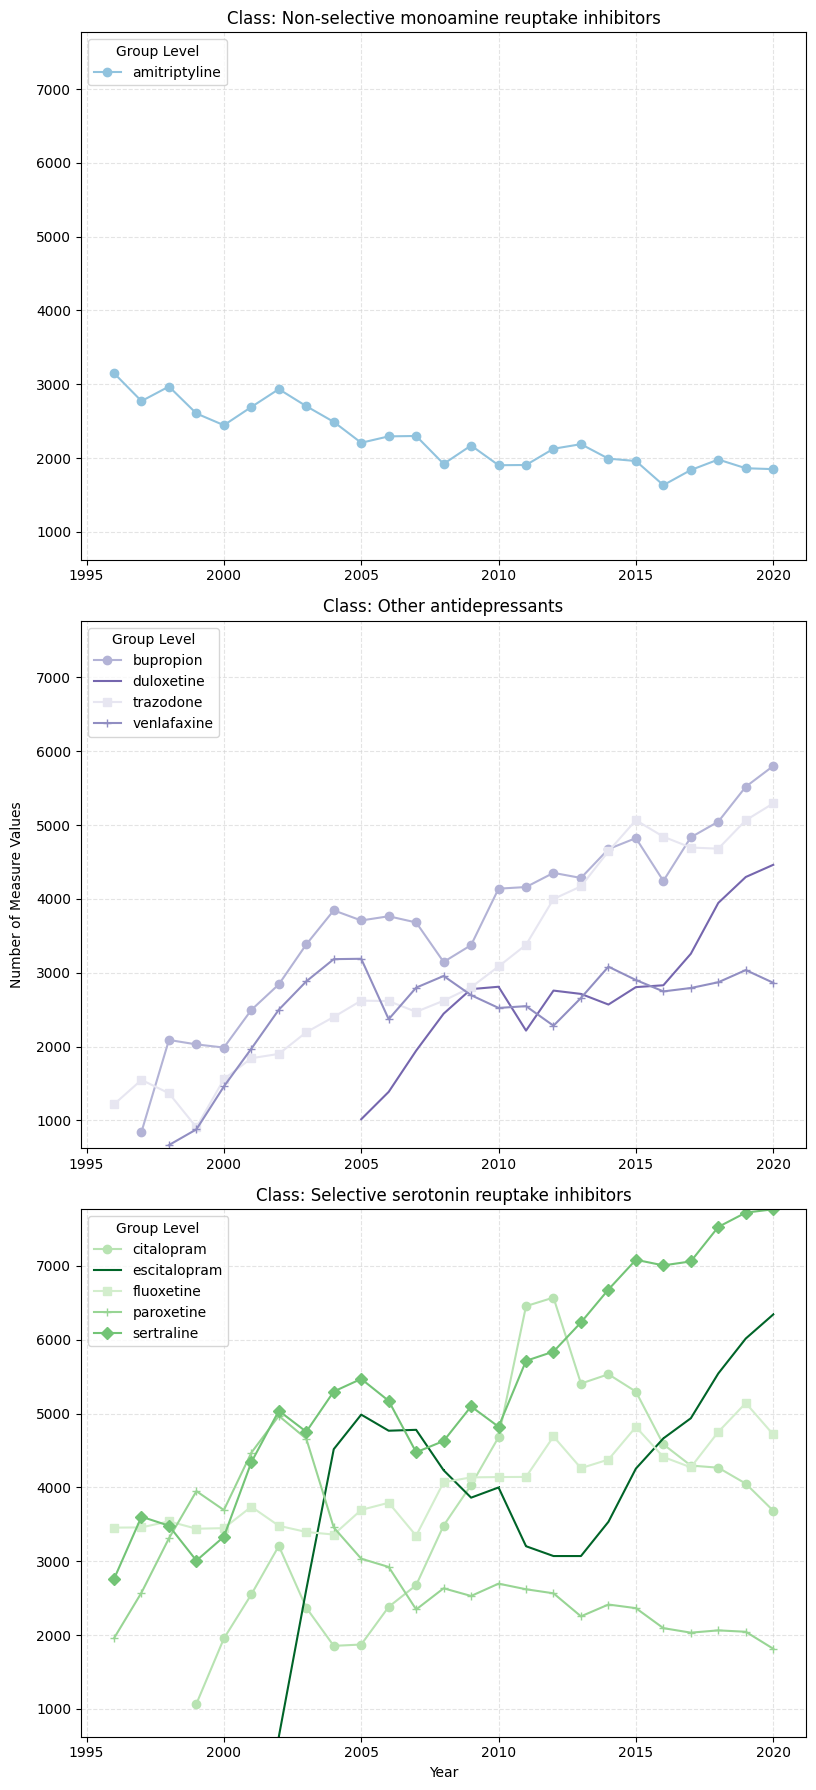

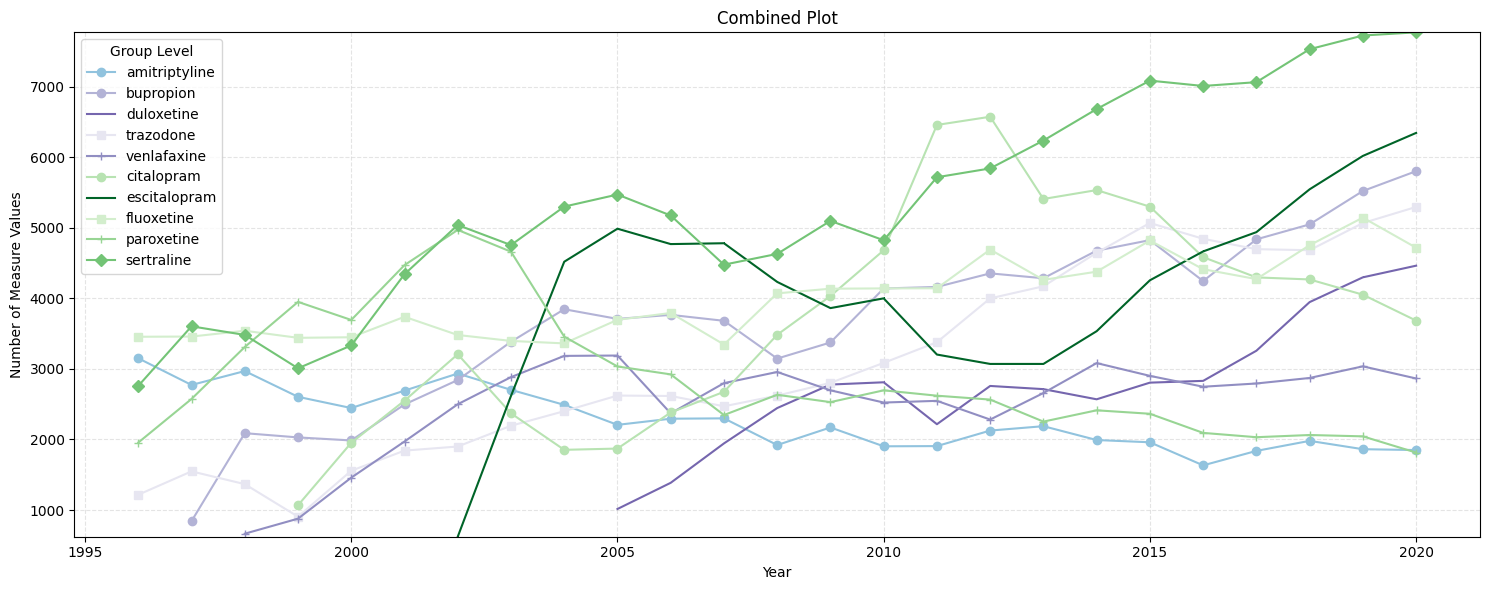

In [26]:
# Example Usage:
plotter = DrugUsePlotter(
    df_drugs_class,
    year_col="Year",
    measure_col="Measure Values",
    color_col="Color",
    group_col="Group Level",
    class_col="Class",
    min_measure_value=2500,
)
plotter.plot(
    separate_plots=True, save_path="02_AllThingsData/US-MEPS/imgs/MEPS_PerClassPlot.png"
)
plotter.plot(
    separate_plots=False,
    save_path="02_AllThingsData/US-MEPS/imgs/MEPS_CombindedPlot.png",
)